<div style="background-color: #058212; border-radius: 20px; color: #fff; font-weight: bold; padding: 10px; text-align:center">
    <h1>Análisis completo de correlaciones en dataset de rendimiento estudiantil</h1>
</div>

<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Cargar librerías</h2>
</div>

In [1]:
import pandas as pd
import numpy as np

from pathlib import Path

actual_dir = Path.cwd()
ruta_outputs = actual_dir.parent / "outputs" / "outputs_dia_4"

ruta_outputs.mkdir(parents=True, exist_ok=True)
print(f"Carpeta creada")

Carpeta creada


<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Crear dataset educativo con múltiples variables</h2>
</div>

In [2]:
# Crear dataset de rendimiento estudiantil
np.random.seed(42)
n_estudiantes = 500

df = pd.DataFrame({
    'id_estudiante': range(1, n_estudiantes + 1),
    'edad': np.random.normal(16, 1.5, n_estudiantes).clip(14, 19).astype(int),
    'horas_estudio_semanal': np.random.normal(20, 8, n_estudiantes).clip(5, 50).astype(int),
    'promedio_calificaciones': np.random.normal(7.5, 1.2, n_estudiantes).clip(1, 10),
    'ingresos_familiares': np.random.lognormal(9, 0.6, n_estudiantes).round(0),
    'nivel_socioeconomico': np.random.choice(['Bajo', 'Medio', 'Alto'], n_estudiantes, p=[0.3, 0.5, 0.2]),
    'asistencia_clases': np.random.normal(85, 15, n_estudiantes).clip(10, 100).astype(int),
    'horas_extracurriculares': np.random.normal(8, 4, n_estudiantes).clip(0, 20).astype(int),
    'satisfaccion_vida': np.random.normal(7.2, 1.5, n_estudiantes).clip(1, 10),
    'nivel_estres': np.random.normal(6.8, 1.8, n_estudiantes).clip(1, 10)
})

# Convertir variables categóricas
nivel_map = {'Bajo': 1, 'Medio': 2, 'Alto': 3}
df['nivel_socioeconomico_num'] = df['nivel_socioeconomico'].map(nivel_map)

print(f"Dataset creado: {len(df)} estudiantes")
print(f"Variables numéricas: {len(df.select_dtypes(include=[np.number]).columns)}")

Dataset creado: 500 estudiantes
Variables numéricas: 10


<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Observaciones</h2>
</div>

- El dataset modificado tiene 3 variables categóricas:
    - Variable nominal: id_estudiante (identificador único sin orden inherente).
    - Variables ordinales: nivel_socioeconomico y nivel_socioeconomico_num (encoder de nivel_socioeconomico).

- El resto de las variables son numéricas continuas: edad, horas_estudio_semanal, promedio_calificaciones, ingresos_familiares, asistencia_clases, horas_extracurriculares, satisfaccion_vida y nivel_estres. Se consideran continuas porque conceptualmente pueden tomar valores fraccionarios con significado real (por ejemplo, 16.5 años, 15.7 horas de estudio, 85.3% de asistencia).

- Las variables satisfaccion_vida y nivel_estres deberían haber sido simuladas como variables ordinales (escalas discretas del 1 al 10), pero en esta simulación fueron generadas como continuas mediante distribuciones normales.

- En la simulación no se establecieron asociaciones entre las variables, por lo que se espera que las correlaciones entre ellas sean despreciables o cercanas a cero.

- El coeficiente de correlación de Pearson es apropiado para evaluar relaciones lineales entre variables continuas.

- Para analizar correlaciones entre variables ordinales o discretas, o entre variables continuas con ordinales o discretas, el método adecuado es el coeficiente de Spearman, que se basa en rangos y no asume linealidad.

- El coeficiente de Pearson puede aplicarse a variables discretas si tienen suficientes valores distintos (idealmente ≥10-15) y la relación es aproximadamente lineal; de lo contrario, Spearman es más apropiado.

- Las variables nominales no se incluyen en análisis de correlación tradicionales, ya que no tienen un orden o magnitud que permita medir asociación lineal o monotónica.

<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Análisis de correlaciones por pares</h2>
</div>

In [3]:
# Correlaciones con calificaciones (método Pearson por defecto)

# modificar df.corr() por df[variables_interes].corr() para evitar ValueError: could not convert string to float: 'Medio'
variables_interes = ['edad', 'horas_estudio_semanal', 'promedio_calificaciones', 
                    'ingresos_familiares', 'asistencia_clases', 'horas_extracurriculares',
                    'satisfaccion_vida', 'nivel_estres', 'nivel_socioeconomico_num']
correlaciones_calificaciones = df[variables_interes].corr()['promedio_calificaciones'].sort_values(ascending=False)

print("CORRELACIONES CON PROMEDIO DE CALIFICACIONES")
print("=" * 50)
for var, corr in correlaciones_calificaciones.items():
    if var != 'promedio_calificaciones':
        intensidad = "Fuerte" if abs(corr) > 0.6 else "Moderada" if abs(corr) > 0.3 else "Débil"
        direccion = "positiva" if corr > 0 else "negativa"
        print(f"{var:25} | {corr:+.3f} | {intensidad} {direccion}")

CORRELACIONES CON PROMEDIO DE CALIFICACIONES
horas_estudio_semanal     | +0.076 | Débil positiva
nivel_socioeconomico_num  | +0.060 | Débil positiva
satisfaccion_vida         | +0.009 | Débil positiva
nivel_estres              | -0.014 | Débil negativa
asistencia_clases         | -0.031 | Débil negativa
ingresos_familiares       | -0.034 | Débil negativa
horas_extracurriculares   | -0.038 | Débil negativa
edad                      | -0.065 | Débil negativa


<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Matriz de correlación completa</h2>
</div>

In [4]:
# Variables numéricas principales
variables_interes = ['edad', 'horas_estudio_semanal', 'promedio_calificaciones', 
                    'ingresos_familiares', 'asistencia_clases', 'horas_extracurriculares',
                    'satisfaccion_vida', 'nivel_estres', 'nivel_socioeconomico_num']

correlation_matrix = df[variables_interes].corr()

print("\nMATRIZ DE CORRELACIÓN")
print("=" * 25)
# Mostrar correlaciones > 0.3 en valor absoluto
strong_correlations = correlation_matrix.where(abs(correlation_matrix) > 0.3)
display(strong_correlations.round(3))


MATRIZ DE CORRELACIÓN


,edad,horas_estudio_semanal,promedio_calificaciones,ingresos_familiares,asistencia_clases,horas_extracurriculares,satisfaccion_vida,nivel_estres,nivel_socioeconomico_num
edad,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
horas_estudio_semanal,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
promedio_calificaciones,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ingresos_familiares,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
asistencia_clases,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
horas_extracurriculares,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
satisfaccion_vida,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
nivel_estres,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
nivel_socioeconomico_num,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Análisis de correlaciones más fuertes</h2>
</div>

In [5]:
# Encontrar pares con correlaciones más fuertes
corr_unstack = correlation_matrix.unstack()
corr_unstack = corr_unstack[corr_unstack.index.get_level_values(0) != corr_unstack.index.get_level_values(1)]

top_correlations = corr_unstack.abs().sort_values(ascending=False).head(20)

print("\nTOP 10 CORRELACIONES MÁS FUERTES")
print("=" * 35)
for (var1, var2), corr_abs in top_correlations.items():
    if var1 < var2:  # Evitar duplicados
        corr_real = correlation_matrix.loc[var1, var2]
        print(f"{var1:21} ↔ {var2:23} | {corr_real:+.3f}")


TOP 10 CORRELACIONES MÁS FUERTES
asistencia_clases     ↔ horas_extracurriculares | -0.117
horas_estudio_semanal ↔ satisfaccion_vida       | -0.103
edad                  ↔ horas_estudio_semanal   | -0.093
asistencia_clases     ↔ horas_estudio_semanal   | -0.087
horas_estudio_semanal ↔ nivel_estres            | -0.079
horas_estudio_semanal ↔ promedio_calificaciones | +0.076
nivel_estres          ↔ satisfaccion_vida       | +0.072
edad                  ↔ ingresos_familiares     | +0.066
edad                  ↔ promedio_calificaciones | -0.065
edad                  ↔ horas_extracurriculares | +0.065


<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Análisis de grupos de variables correlacionadas</h2>
</div>

In [6]:
# Identificar clusters de variables relacionadas
print("\nANÁLISIS DE GRUPOS CORRELACIONADOS")
print("=" * 40)

# Variables relacionadas con rendimiento académico
academic_vars = ['horas_estudio_semanal', 'asistencia_clases', 'promedio_calificaciones']
academic_corr = df[academic_vars].corr()
print("Variables académicas:")
print(academic_corr.round(3))

# Variables relacionadas con bienestar
wellbeing_vars = ['satisfaccion_vida', 'nivel_estres', 'horas_extracurriculares']
wellbeing_corr = df[wellbeing_vars].corr()
print("\nVariables de bienestar:")
print(wellbeing_corr.round(3))

# Variables socioeconómicas
socio_vars = ['ingresos_familiares', 'nivel_socioeconomico_num', 'promedio_calificaciones']
socio_corr = df[socio_vars].corr()
print("\nVariables socioeconómicas:")
print(socio_corr.round(3))


ANÁLISIS DE GRUPOS CORRELACIONADOS
Variables académicas:
                         horas_estudio_semanal  asistencia_clases  \
horas_estudio_semanal                    1.000             -0.087   
asistencia_clases                       -0.087              1.000   
promedio_calificaciones                  0.076             -0.031   

                         promedio_calificaciones  
horas_estudio_semanal                      0.076  
asistencia_clases                         -0.031  
promedio_calificaciones                    1.000  

Variables de bienestar:
                         satisfaccion_vida  nivel_estres  \
satisfaccion_vida                    1.000         0.072   
nivel_estres                         0.072         1.000   
horas_extracurriculares             -0.033        -0.011   

                         horas_extracurriculares  
satisfaccion_vida                         -0.033  
nivel_estres                              -0.011  
horas_extracurriculares                   

<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Visualización de correlaciones</h2>
</div>


Mapa de calor guardado como 'matriz_correlacion_estudiantil.png'


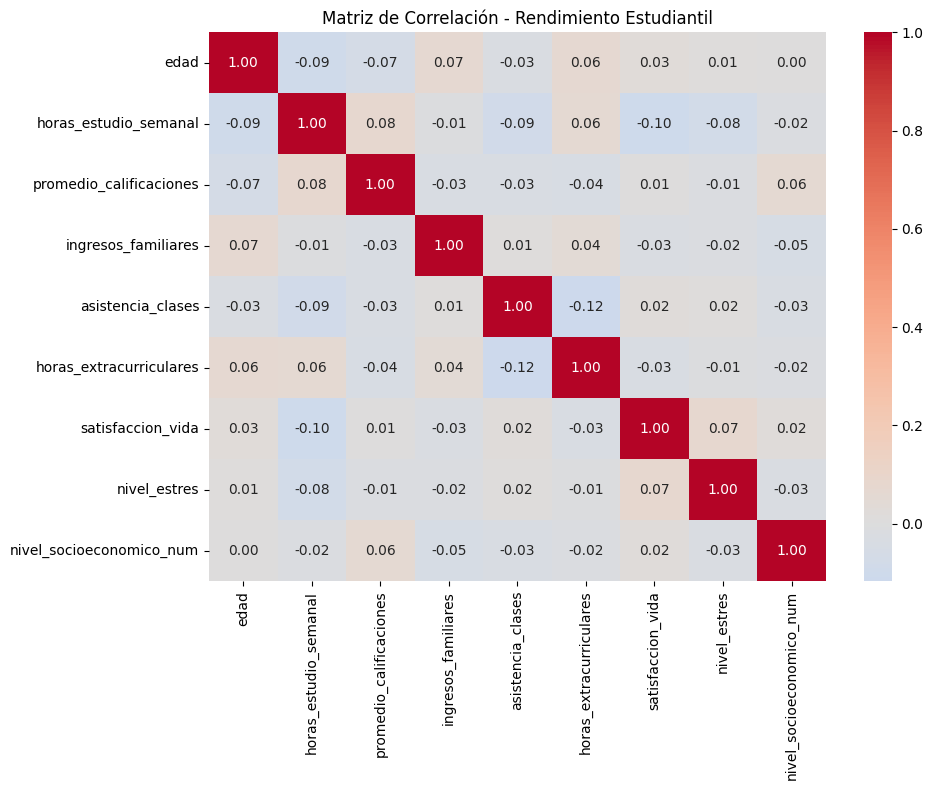

In [7]:
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Matriz de Correlación - Rendimiento Estudiantil')
    plt.tight_layout()
    plt.savefig(ruta_outputs / 'matriz_correlacion_estudiantil.png', dpi=100, bbox_inches='tight')
    print("\nMapa de calor guardado como 'matriz_correlacion_estudiantil.png'")
    
except ImportError:
    print("\nMatplotlib/Seaborn no disponibles - omitiendo visualización")

<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Observaciones</h2>
</div>

In [8]:
# calcular valor absoluto máximo de las correlaciones

rho_abs_max = df[variables_interes].corr().abs()
np.fill_diagonal(rho_abs_max.values, np.nan)
rho_abs_max = rho_abs_max.max().max()
print(f'El valor absoluto máximo de las correlaciones (rho_abs_max) es: {rho_abs_max:.3f}')

El valor absoluto máximo de las correlaciones (rho_abs_max) es: 0.117


- Todas las correlaciones de Pearson observadas son despreciables (rho_abs_max < 0.12), lo cual es consistente con el diseño de la simulación, donde las variables fueron generadas de forma independiente sin establecer asociaciones entre ellas. Se concluye que no existen relaciones lineales significativas entre las variables analizadas.

- Las correlaciones observadas son tan bajas que no permiten identificar ni analizar posibles vínculos causales entre las variables, incluso en aquellos casos donde teóricamente podría esperarse una relación (por ejemplo, entre horas de estudio y calificaciones).

- En el cálculo de las correlaciones se incluyó la variable ordinal nivel_socioeconomico_num que, como se mencionó anteriormente, debió ser analizada con el coeficiente de correlación de Spearman en lugar de Pearson.

<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Análisis de Posibles Relaciones Causales desde la Perspectiva Teórica</h2>
</div>

Identifica qué correlaciones tienen sentido causal (ej: horas de estudio → calificaciones) vs cuáles podrían ser espurias, y explica insights específicos del análisis de rendimiento estudiantil.

Como se mencionó anteriormente, las correlaciones observadas en el dataset son despreciables y no permiten identificar vínculos causales entre las variables. Por ello, a continuación se presenta un análisis basado en la teoría y la evidencia empírica del fenómeno de rendimiento estudiantil, identificando qué relaciones tendrían sentido causal en un contexto real.

**Relaciones con sentido causal directo**   

- horas_estudio_semanal (var. independiente) → promedio_calificaciones (var. dependiente). 
Existe amplia evidencia de que dedicar mayor tiempo de estudio se asocia causalmente con mejores calificaciones. Sin embargo, esta relación no suele ser estrictamente lineal: estudiar en exceso puede generar agotamiento, falta de sueño y síntomas de burnout, reduciendo el rendimiento. La relación sigue una curva con rendimientos decrecientes, donde existe un punto óptimo de horas de estudio. [Más información.](https://www.biobiochile.cl/noticias/2011/10/25/encuesta-revela-que-tiempo-del-alumno-dedicado-al-estudio-marca-diferencia-en-resultados.shtml)

- asistencia_clases (var. independiente) → promedio_calificaciones (var. dependiente). 
La asistencia regular y activa a clases permite acceder al contenido, recibir retroalimentación del docente y participar del proceso formativo, factores que influyen causalmente en el rendimiento académico. Es la asistencia activa la que genera el efecto positivo, no la mera presencia pasiva como oyente. [Más información.](https://inndoc.org/ponencia/la-importancia-de-la-asistencia-a-clase-en-el-rendimiento-academico/)

- horas_extracurriculares (var. independiente) → promedio_calificaciones (var. dependiente). 
Las actividades extracurriculares influyen en el rendimiento académico. En niveles moderados y bien gestionados tienden a mejorarlo, pues fortalecen habilidades cognitivas, socioemocionales y reducen el estrés. Sin embargo, una carga excesiva puede disminuir tiempo de estudio y descanso, afectando negativamente las calificaciones. El efecto, por tanto, puede ser positivo o negativo según el equilibrio, siguiendo una relación curvilínea.

**Relaciones con sentido causal con efecto mediado**   

- nivel_socioeconomico (var. independiente) → promedio_calificaciones (var. dependiente). 
El nivel socioeconómico -constructo que incluye ingresos, educación y ocupación de los padres- influye de manera positiva indirecta sobre el rendimiento académico mediante mediadores como la calidad de los recursos educativos disponibles, el nivel de apoyo familiar, la nutrición, el ambiente del hogar, la estabilidad emocional y la calidad del establecimiento educacional. [Más información.](https://archivos.agenciaeducacion.cl/Factores_Asociados_SIMCE_2010.pdf)

- nivel_socioeconomico (var. independiente) → satisfaccion_vida y nivel_estres (vars. dependientes). 
El nivel socioeconómico actúa como un factor condicionante que influye en la satisfacción por la vida y los niveles de estrés. Un mayor nivel socioeconómico suele asociarse con mejores condiciones materiales, mayor estabilidad, acceso a servicios y menor vulnerabilidad, lo que tiende a aumentar la satisfacción vital y reducir el estrés percibido.

**Relaciones con sentido causal bidireccional**   

- nivel_estres ↔ promedio_calificaciones. 
La relación entre estrés y rendimiento académico no es lineal; suele describirse mediante la Ley de Yerkes-Dodson, que propone una curva en U invertida donde un nivel moderado de activación puede facilitar el desempeño, mientras que niveles demasiado bajos o altos lo perjudican. A su vez, el rendimiento académico influye en los niveles de estrés: calificaciones bajas tienden a aumentarlo y calificaciones altas pueden reducirlo o mantenerlo en niveles óptimos. [Más información.](https://www.psicologiamadrid.es/estres-escola-causas-consecuencias-soluciones-estudiantes-familias/#:~:text=Seg%C3%BAn%20estudios%20recientes%2C%20el%20estr%C3%A9s,de%20concentraci%C3%B3n%20y%20agotamiento%20emocional.)

- satisfacción_vida ↔ promedio_calificaciones. 
Un mayor nivel de satisfacción con la vida puede mejorar la motivación, la autorregulación emocional y la disposición al aprendizaje, favoreciendo un mejor rendimiento académico. A su vez, obtener buenos resultados y alcanzar metas académicas aumenta la satisfacción vital, generando un círculo virtuoso. Esta relación no es espuria, ya que existen mecanismos psicológicos y conductuales directos que explican la reciprocidad. [Más información.](https://www.redalyc.org/pdf/967/96749326002.pdf#:~:text=Respecto%20de%20la%20relaci%C3%B3n%20entre%20satisfacci%C3%B3n%20con,directas%20entre%20notas%20medias%20obtenidas%20por%20estos)

- nivel_estres ↔ satisfacción_vida. 
Ambas variables se relacionan de forma bidireccional: un mayor estrés tiende a disminuir la satisfacción con la vida, y una menor satisfacción vital puede incrementar el estrés. El vínculo es mutuamente reforzante y negativo, creando potencialmente ciclos de retroalimentación negativa.

**Correlación espuria / Con efecto mediado**    

- edad → promedio_calificaciones. 
La relación entre edad y rendimiento académico presenta dos caras distintas según el contexto:
    - Entre diferentes grados escolares, la asociación positiva refleja un vínculo causal mediado: la edad avanzada permite mayor madurez cognitiva y acumulación de experiencia educativa, que a su vez mejoran el rendimiento.
    - Dentro del mismo grado escolar, cualquier correlación observada es generalmente espuria: variables como la repitencia previa o el acceso diferencial a educación preescolar explican simultáneamente tanto la mayor edad del estudiante como su mejor desempeño académico.

Considerando las relaciones ente variables comentadas, una mejor simulación del rendimiento escolar sería la siguiente.

In [9]:
df2 = pd.DataFrame({
     'id_estudiante': range(1, n_estudiantes + 1),
     'edad': np.random.normal(16, 1.5, n_estudiantes).clip(14, 19).astype(int),
     'horas_estudio_semanal': np.random.normal(20, 8, n_estudiantes).clip(5, 50).astype(int),
     'ingresos_familiares': np.random.lognormal(9, 0.6, n_estudiantes).round(0),
     'asistencia_clases': np.random.normal(85, 15, n_estudiantes).clip(10, 100).astype(int),
     'horas_extracurriculares': np.random.normal(8, 4, n_estudiantes).clip(0, 20).astype(int),
})

# simular nivel socioeconómico

def asignar_NSE(ingreso):
    '''Asignar nivel socioeconómico en función de los ingresos'''

    nse = [1, 2, 3] # ['Bajo', 'Medio', 'Alto']
    if ingreso < df['ingresos_familiares'].quantile(0.35):
        return np.random.choice(nse, p=[0.80, 0.20, 0])
    elif ingreso < df['ingresos_familiares'].quantile(0.65):
        return np.random.choice(nse, p=[0.2, 0.75, 0.05])
    elif ingreso < df['ingresos_familiares'].quantile(0.85):
        return np.random.choice(nse, p=[0, 0.6, 0.4])
    else:
        return np.random.choice(nse, p=[0, 0.1, 0.9])

df2['nivel_socioeconomico'] = df2['ingresos_familiares'].map(asignar_NSE)

# simular satisfaccion_vida en función de los ingresos

def asignar_satisfaccion(ingreso):
    '''Asignar nivel de satisfacción en función de los ingresos en escala cuantitativa del 1 al 5'''

    escala = range(1, 6)
    if ingreso < df['ingresos_familiares'].quantile(0.35):
        return np.random.choice(escala, p=[0.2, 0.3, 0.3, 0.15, 0.05])
    elif ingreso < df['ingresos_familiares'].quantile(0.65):
        return np.random.choice(escala, p=[0.1, 0.1, 0.2,  0.4, 0.2])
    elif ingreso < df['ingresos_familiares'].quantile(0.85):
        return np.random.choice(escala, p=[0.05, 0.05, 0.3, 0.4, 0.2])
    else:
        return np.random.choice(escala, p=[0.05, 0.05, 0.1, 0.4, 0.4])
    
df2['satisfaccion_vida'] = df2['ingresos_familiares'].map(asignar_satisfaccion)

# simular nivel_estres

df2['nivel_estres'] = 5 - df2['satisfaccion_vida'] + np.random.normal(2, 0.5) # agregar ruido
df2['nivel_estres'] = df2['nivel_estres'].round(0).astype(int).clip(1, 5)

# simular el rendimiento académico de manera muy simple, considerando solo relaciones lineales

df2['promedio_calificaciones'] = 0.70 * df2['horas_estudio_semanal'] / df2['horas_estudio_semanal'].max() +\
                                 0.30 * df2['ingresos_familiares'] / df2['ingresos_familiares'].max() +\
                                 0.15 * df2['nivel_socioeconomico'] / df2['nivel_socioeconomico'].max() +\
                                 0.59 * df2['asistencia_clases'] / df2['asistencia_clases'].max() +\
                                 0.12 * df2['horas_extracurriculares'] / df2['horas_extracurriculares'].max() +\
                                 0.35 * df2['satisfaccion_vida'] / df2['satisfaccion_vida'].max() +\
                                 -0.28 * df2['nivel_estres'] / df2['nivel_estres'].max() +\
                                 np.random.normal(0, 0.2) # ruido

df2['promedio_calificaciones'] = df2['promedio_calificaciones'] / df2['promedio_calificaciones'].max() * 9 + 1.0

Para finalizar, calculamos la matriz de correlación usando el método de Spearman porque hay 3 variables ordinales ('nivel_socioeconomico', 'satisfaccion_vida' y 'nivel_estres').

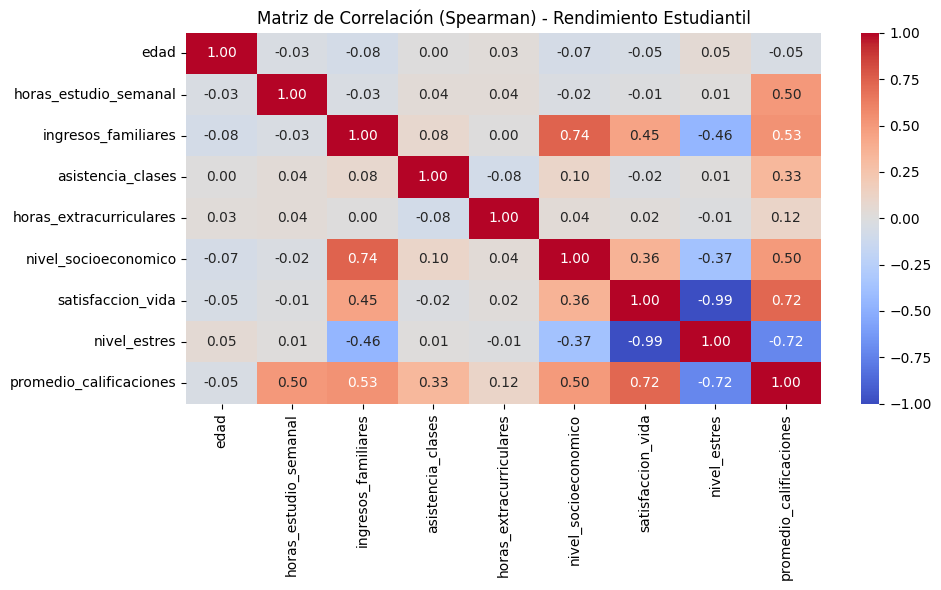

In [10]:
try:
    import matplotlib.pyplot as plt
    import seaborn as sns

    vars = [col for col in df2.columns if col not in ['id_estudiante']]
    plt.figure(figsize=(10, 6))
    sns.heatmap(df2[vars].corr('spearman'), annot=True, cmap='coolwarm', center=0, fmt='.2f', vmin=-1, vmax=1)
    plt.title('Matriz de Correlación (Spearman) - Rendimiento Estudiantil')
    plt.tight_layout()
    
except ImportError:
    print("\nMatplotlib/Seaborn no disponibles - omitiendo visualización")

Vemos que la matriz obtenida muestra resultados más consistentes con las relaciones entre variables comentadas anteriormente desde una perspectiva teórica.